In [1]:
import pandas as pd

In [2]:
latinos_country = pd.read_csv(r"C:\Users\Huy\Desktop\Dataset\latinos_countryOfOrigin.txt", sep='\t')

In [3]:
ukb_demographics = pd.read_csv(r"C:\Users\Huy\Desktop\Dataset\ukb_demographics.txt", sep='\t')

In [4]:
ukb_latino = pd.merge(latinos_country, ukb_demographics, how='inner', on=['eid'])
ukb_latino['EthnicGroup'] = ukb_latino['EthnicGroup'].replace(['White', 'OtherEthnicity', 'Mixed', 'Chinese', 'Asian', 'Black'],'Latino')

In [5]:
#CHANGE FILE NAME HERE
condense_complications = pd.read_csv(r"C:\Users\Huy\Desktop\BIOL8901\UKBB\Cardiovascular\Cardiovascular_complications.csv", converters={'Complications': eval})

In [6]:
#Create divide dataframe by gender; find frequency of cumulative phenotypes
gender = condense_complications.groupby(condense_complications['Sex'])
male_df = gender.get_group('Male')
female_df = gender.get_group('Female')
male_frequency = male_df.groupby(male_df['Cumulative Phenotypes']).count()
male_frequency['Percent'] = male_frequency['Complications'] / male_frequency['Complications'].sum() * 100
female_frequency = female_df.groupby(female_df['Cumulative Phenotypes']).count()
female_frequency['Percent'] = female_frequency['Complications'] / female_frequency['Complications'].sum() * 100

In [12]:
#Find frequency based on threshold
#CHANGE NUMBERS HERE
group_early = {}
baseline = []
group_late = {}
for index, row in condense_complications.iterrows():
    if row['Age'] < 52 and row['Cumulative Phenotypes'] < 2.5:
        for disease in row['Complications']:
            if disease not in group_early:
                group_early[disease] = 1
            else:
                group_early[disease] += 1
    if row['Age'] >= 52 and row['Cumulative Phenotypes'] > 2.5:
        for disease in row['Complications']:
            if disease not in group_late:
                group_late[disease] = 1
            else:
                group_late[disease] += 1
    if row['Age'] == 52 and row['Cumulative Phenotypes'] == 2:
        for disease in row['Complications']:
            baseline.append(disease)
early_df = pd.DataFrame(list(group_early.items()),columns = ['Early Disease','Frequency']).sort_values(by=['Frequency'], ascending = False)
baseline_df = pd.DataFrame(baseline ,columns = ['Baseline Disease'])
late_df = pd.DataFrame(list(group_late.items()),columns = ['Late Disease','Frequency']).sort_values(by=['Frequency'], ascending = False)

In [13]:
early_df

,Early Disease,Frequency
6,411.3_Angina_pectoris.txt,6
7,411.8_Other_chronic_ischemic_heart_disease__un...,3
5,411.2_Myocardial_infarction.txt,2
8,530.9_Heartburn.txt,2
0,394.2_Mitral_valve_disease.txt,1
1,395.1_Nonrheumatic_mitral_valve_disorders.txt,1
2,394.7_Disease_of_tricuspid_valve.txt,1
3,420.21_Acute_pericarditis.txt,1
4,411.1_Unstable_angina__intermediate_coronary_s...,1
9,414.0_Other_forms_of_chronic_heart_disease.txt,1


In [14]:
baseline_df

,Baseline Disease


In [15]:
late_df

,Late Disease,Frequency
10,395.1_Nonrheumatic_mitral_valve_disorders.txt,6
8,394.2_Mitral_valve_disease.txt,6
3,411.8_Other_chronic_ischemic_heart_disease__un...,6
2,411.3_Angina_pectoris.txt,5
5,395.6_Heart_valve_replaced.txt,5
1,411.2_Myocardial_infarction.txt,3
9,394.3_Aortic_valve_disease.txt,3
0,394.0_Rheumatic_disease_of_the_heart_valves.txt,3
7,428.2_Heart_failure_NOS.txt,3
6,428.1_Congestive_heart_failure__CHF__NOS.txt,2


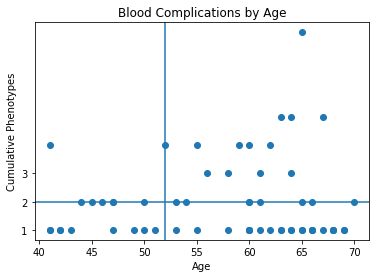

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(condense_complications['Age'], condense_complications['Cumulative Phenotypes'])
plt.axhline(y=2)
plt.axvline(x=52)
plt.yticks([1,2,3])
plt.xlabel("Age")
plt.ylabel("Cumulative Phenotypes")
plt.title("Blood Complications by Age")
plt.show()

In [16]:
print(male_frequency['Percent'])
print(female_frequency['Percent'])
print(male_frequency['Complications'])
print(female_frequency['Complications'])

Cumulative Phenotypes
1    55.555556
2    22.222222
3     3.703704
4    11.111111
5     3.703704
8     3.703704
Name: Percent, dtype: float64
Cumulative Phenotypes
1    51.515152
2    24.242424
3     9.090909
4     9.090909
5     6.060606
Name: Percent, dtype: float64
Cumulative Phenotypes
1    15
2     6
3     1
4     3
5     1
8     1
Name: Complications, dtype: int64
Cumulative Phenotypes
1    17
2     8
3     3
4     3
5     2
Name: Complications, dtype: int64


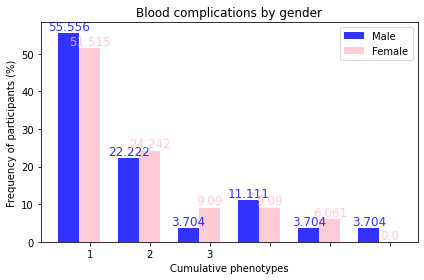

In [18]:
#Bar graph
# data to plot
n_groups = 6
male_frequency = (55.556, 22.222, 3.704, 11.111, 3.704, 3.704)
female_frequency = (51.515, 24.242, 9.090, 9.090, 6.061, 0)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, male_frequency, bar_width, alpha=opacity, color='b', label='Male')

rects2 = plt.bar(index + bar_width, female_frequency, bar_width, alpha=opacity, color='pink', label='Female')

plt.xlabel('Cumulative phenotypes')
plt.ylabel('Frequency of participants (%)')
plt.title('Blood complications by gender')
plt.xticks(index + bar_width, ('1', '2', '3'))
plt.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

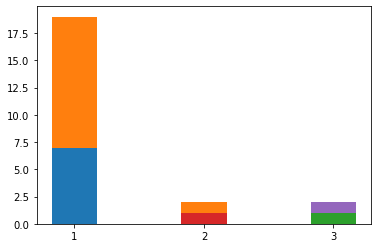

In [94]:
import matplotlib.pyplot as plt


labels = ['1', '2', '3']
vitamin = [7, 1, 0]
iron = [12, 1, 1]
b = [0, 0, 1]
otherv = [0, 0, 1]
abnormality = [0, 1, 0]
iron_meta = [1, 0, 0]
immune = [0, 1, 0]
sickle = [1, 0, 0]
aplastic = [1, 0, 0]
personal = [1, 0, 0]
hereditary = [1, 0, 0]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, vitamin, width, label='Vitamin D deficiency')
ax.bar(labels, iron, width, bottom=vitamin, label='Iron deficiency')
ax.bar(labels, b, width, label='Folate deficiency')
ax.bar(labels, abnormality, width, label='History of blood diseases')
ax.bar(labels, otherv, width, bottom=b, label='Other')
ax.bar(labels, iron_meta, width, bottom=vitamin, label='Other')
ax.bar(labels, immune, width, bottom=abnormality, label='Other')
ax.bar(labels, sickle, width, bottom=iron_meta, label='Other')
ax.bar(labels, aplastic, width, bottom=sickle, label='Other')
ax.bar(labels, personal, width, bottom=folate, label='Other')
ax.bar(labels, hereditary, width, bottom=folate, label='Other')

plt.xlabel('Cumulative phenotypes')
ax.set_ylabel('Number of participants')
ax.set_title('Blood complications for men')
ax.legend()

plt.show()

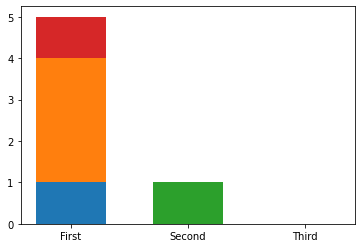

In [77]:
import matplotlib.pyplot as plt

# Define Data

Class = ["First", "Second", "Third"]
vitamin = [1, 0, 0]
iron = [4, 0, 0]
folate = [0, 1, 0]
history = [1, 0, 0]
other = [0, 1, 0]

# Define width of stacked chart

w = 0.6

# Plot stacked bar chart

plt.bar(Class, vitamin, w)
plt.bar(Class, iron, w, bottom=vitamin)
plt.bar(Class, folate, w, bottom=iron)
plt.bar(Class, history, w, bottom = iron)

# Display

plt.show()